# Frame Classification using ResNet + BI-LSTM with data augmentation

This notebook creates and trains a BI-LSTM based classifier with a dataset, where data augmentation was applied, build arround feature vectors of dimension 512.

In [1]:
from utils2 import *
import os

%load_ext autoreload
%autoreload 2

## Train models

We will use the best configuration we found with our wandb project

In [2]:
best_config = {
    'abs_path': '../', # project path 
    'sequence_length': 300, 
    'backbone': 'resnet',
    'layers': 'bilstm',
    'dropout_rate': 0.5,
    'num_layers': 1,
    'num_units': 128,
    'loss': 'binary_crossentropy',
    'optimizer': 'adam',
    'learning_rate': 0.001,
    'epochs': 50,
    'batch_size': 32,
    'es_monitor': 'val_prc',
    'es_mode': 'max',
    'es_patience': 5,
    'norm' : False,
    'num_heads' : 1,
    'model_name' : 'bilstm512_augmented'
}

## Final model Training & Evaluation

(709, 300, 512) (709, 300, 2)
(122, 300, 512) (122, 300, 2)
Running experiment for Grooming
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7112 - fn: 3803.6956 - fp: 28321.3906 - loss: 0.5966 - prc: 0.2669 - precision: 0.2014 - recall: 0.6069 - tn: 74669.3047 - tp: 8053.4346   
Epoch 1: val_loss improved from inf to 0.62376, saving model to bilstm512_augmented_grooming.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7125 - fn: 3882.5417 - fp: 29184.6660 - loss: 0.5943 - prc: 0.2704 - precision: 0.2035 - recall: 0.6127 - tn: 77448.8750 - tp: 8408.9170 - val_accuracy: 0.7020 - val_fn: 69.0000 - val_fp: 10839.0000 - val_loss: 0.6238 - val_prc: 0.6419 - val_precision: 0.2431 - val_recall: 0.9806 - val_tn: 22210.0000 - val_tp: 3482.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 708ms/step - accuracy: 0.8764 - fn: 1301.9131 - fp: 13163.6523 - loss: 0.3111 - prc: 0.6917 - precision: 0.4444 - recall: 0.8923 - tn: 89982.7422 - tp: 10399.5215
Epoch 2: val_loss improved 

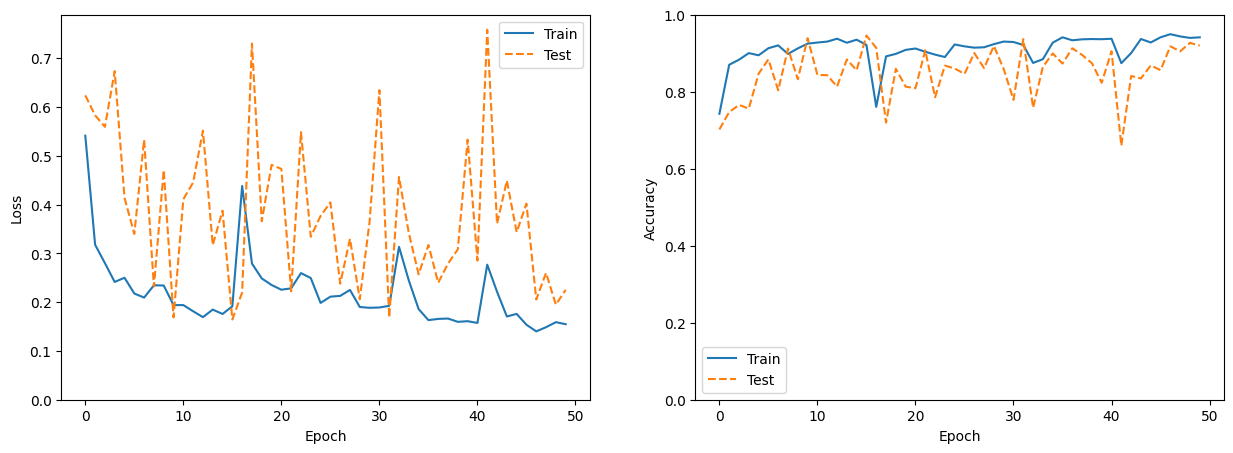

23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 920ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step  


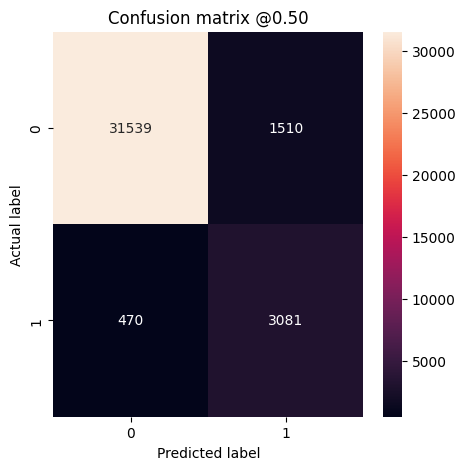

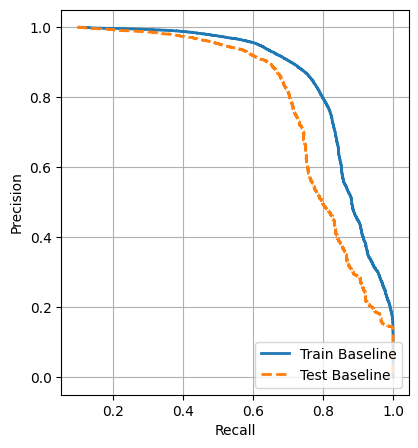

/Users/saraalbarran/Documents/SARA/ratolins/AutomatedMouseBehaviorRecognition/notebooks/utils2.py:385: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_metrics = pd.concat([


Running experiment for Rearing
Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5443 - fn: 10926.5215 - fp: 37897.2188 - loss: 0.6909 - prc: 0.2942 - precision: 0.2745 - recall: 0.5756 - tn: 50604.4766 - tp: 15419.6084
Epoch 1: val_loss improved from inf to 0.39051, saving model to bilstm512_augmented_rearing.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - accuracy: 0.5469 - fn: 11245.8330 - fp: 39031.5820 - loss: 0.6893 - prc: 0.2967 - precision: 0.2760 - recall: 0.5771 - tn: 52653.2930 - tp: 15994.2920 - val_accuracy: 0.8899 - val_fn: 2701.0000 - val_fp: 1330.0000 - val_loss: 0.3905 - val_prc: 0.3384 - val_precision: 0.4282 - val_recall: 0.2694 - val_tn: 31573.0000 - val_tp: 996.0000
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7046 - fn: 8462.5215 - fp: 27085.9121 - loss: 0.5866 - prc: 0.5049 - precision: 0.4074 - recall: 0.6368 - tn: 62313.4766 - tp: 16985.9121   
Epoch 2: val_loss improved from 0.39051 to 0.35487, saving model to bilstm512_augmented

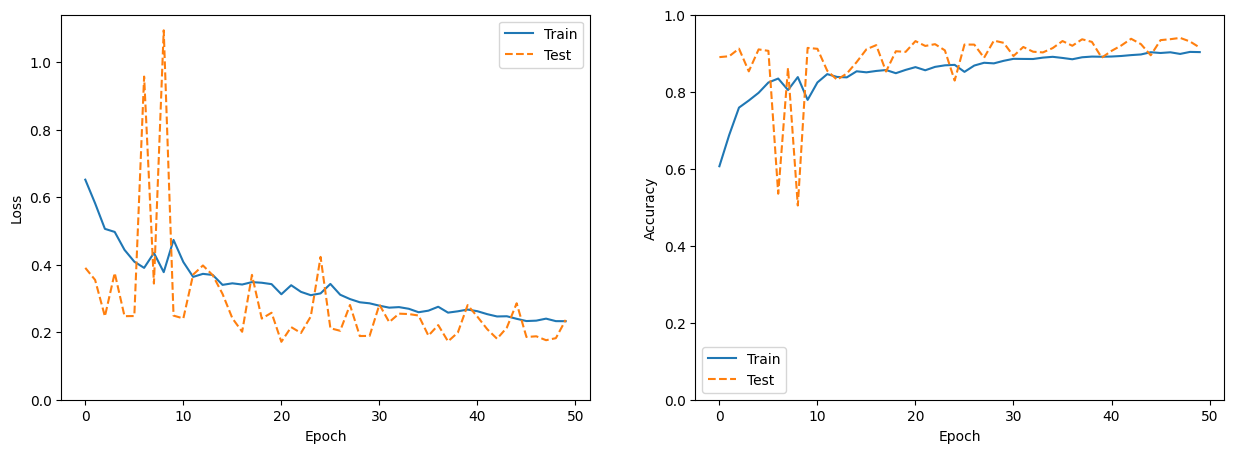

23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 822ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step 


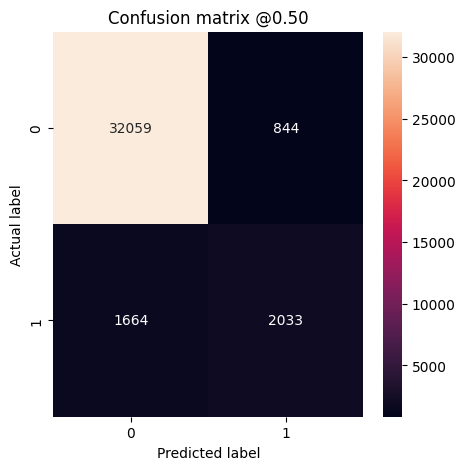

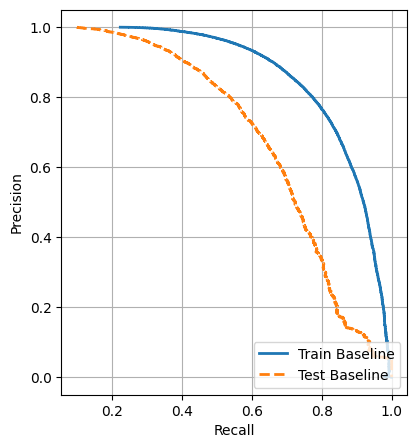

In [3]:
metrics = train_test_model(best_config)

## Evaluate model

On the following section we will evaluate the model on the validation set. 

In [4]:
from evaluation_utils import *
import keras

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Load validation data
path = '../data/processed/Dataset/'
val_data = load_dataset(path, 'resnet')
print('Validation videos: ', val_data.keys())

# Per each video, generate sequences
val_seq = {}
for i in list(val_data.keys()):
    X, Y = generate_sequences(val_data[i], 300)
    val_seq[i] = [X, Y]

behaviours = ['Grooming', 'Rearing']

# We will load the models
if 'Grooming' in behaviours:
    model_grooming = keras.models.load_model('bilstm512_augmented_grooming.keras', compile=True)
if 'Rearing' in behaviours:
    model_rearing = keras.models.load_model('bilstm512_augmented_rearing.keras', compile=True)

# Initialzie dataframes to save metrics
df_g = pd.DataFrame(columns=['Accuracy','Precision','Recall','PRC'], index=list(val_data.keys()))
df_r = pd.DataFrame(columns=['Accuracy','Precision','Recall','PRC'], index=list(val_data.keys()))

Validation videos:  dict_keys(['1', 'Animal62418', 'HD_ChR2_480A'])


In [15]:
df_g

,Accuracy,Precision,Recall,PRC
1,0.995641,1.0,0.848214,0.941018
Animal62418,0.948254,0.689189,0.144068,0.469073
HD_ChR2_480A,0.953623,0.920472,0.842219,0.944466


In [16]:
df_r

,Accuracy,Precision,Recall,PRC
1,0.983846,0.823529,0.189189,0.479434
Animal62418,0.894921,0.782779,0.42061,0.663376
HD_ChR2_480A,0.916667,0.840749,0.62057,0.812127


### Results video 1.mp4

In [9]:
X, Y = val_seq['1']

# Add metrics to DataFrame
df_g.loc['1'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['1'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.9956 - fn: 17.0000 - fp: 0.0000e+00 - loss: 0.0263 - prc: 0.9410 - precision: 1.0000 - recall: 0.8482 - tn: 3788.0000 - tp: 95.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.9838 - fn: 60.0000 - fp: 3.0000 - loss: 0.0579 - prc: 0.4794 - precision: 0.8235 - recall: 0.1892 - tn: 3823.0000 - tp: 14.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step


We will start by plotting the labels and actual predictions along the video frames.


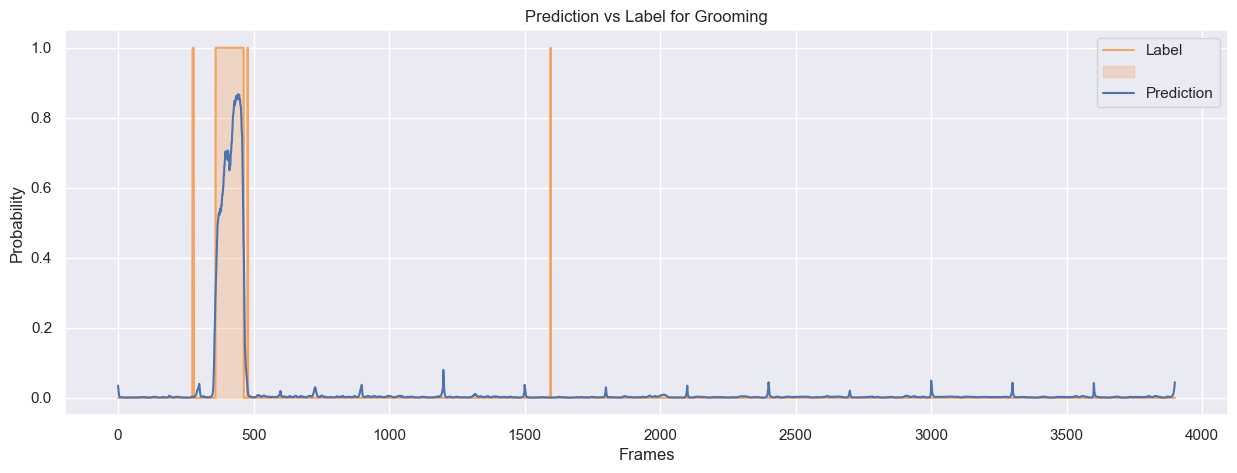

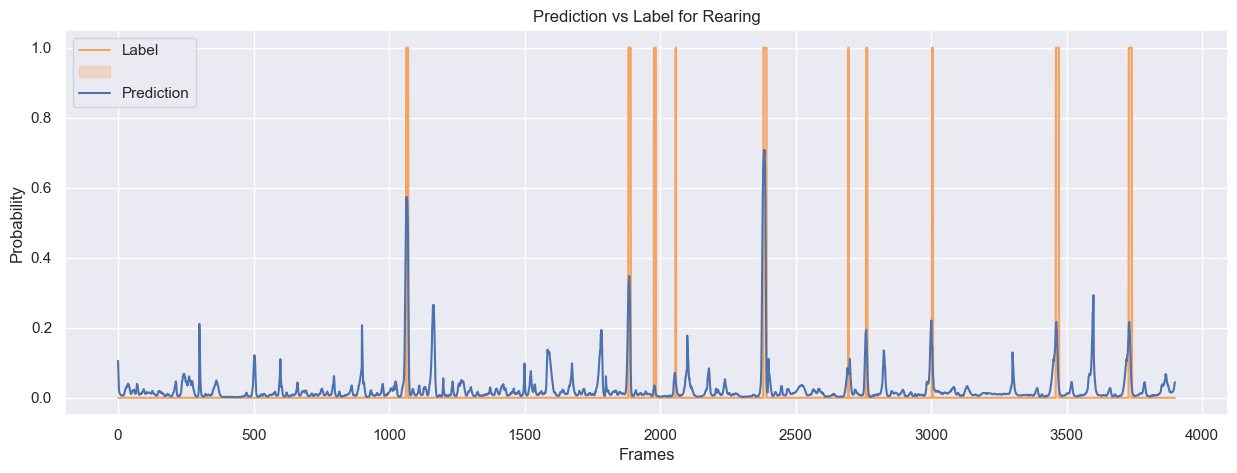

We will compute the PRC curve to choose the best threshold.


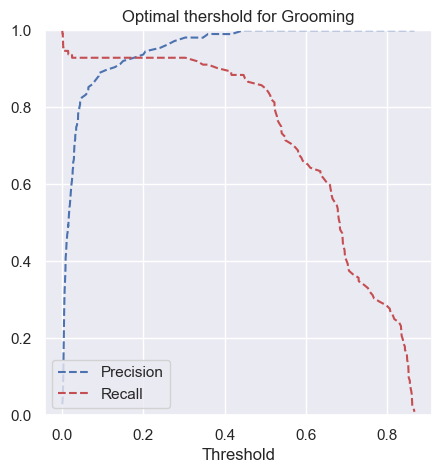

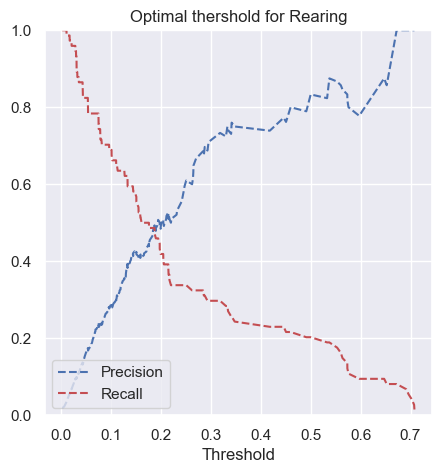

Lastly we will plot the confussion matrix for each behaviour


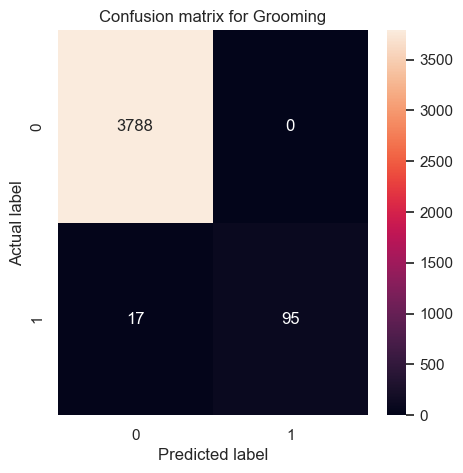

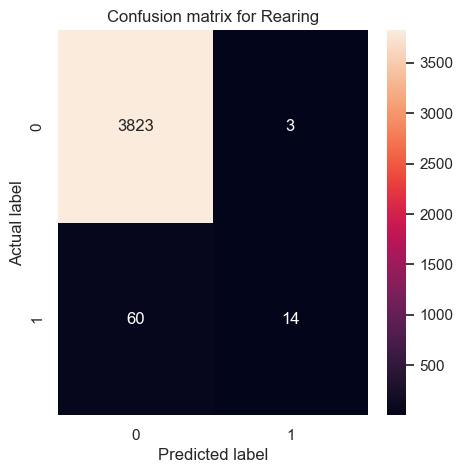

In [10]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video Animal62418.mp4

In [11]:
X, Y = val_seq['Animal62418']

# Add metrics to DataFrame
df_g.loc['Animal62418'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['Animal62418'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.9483 - fn: 303.0000 - fp: 23.0000 - loss: 0.1628 - prc: 0.4691 - precision: 0.6892 - recall: 0.1441 - tn: 5923.0000 - tp: 51.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8949 - fn: 551.0000 - fp: 111.0000 - loss: 0.2724 - prc: 0.6634 - precision: 0.7828 - recall: 0.4206 - tn: 5238.0000 - tp: 400.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


We will start by plotting the labels and actual predictions along the video frames.


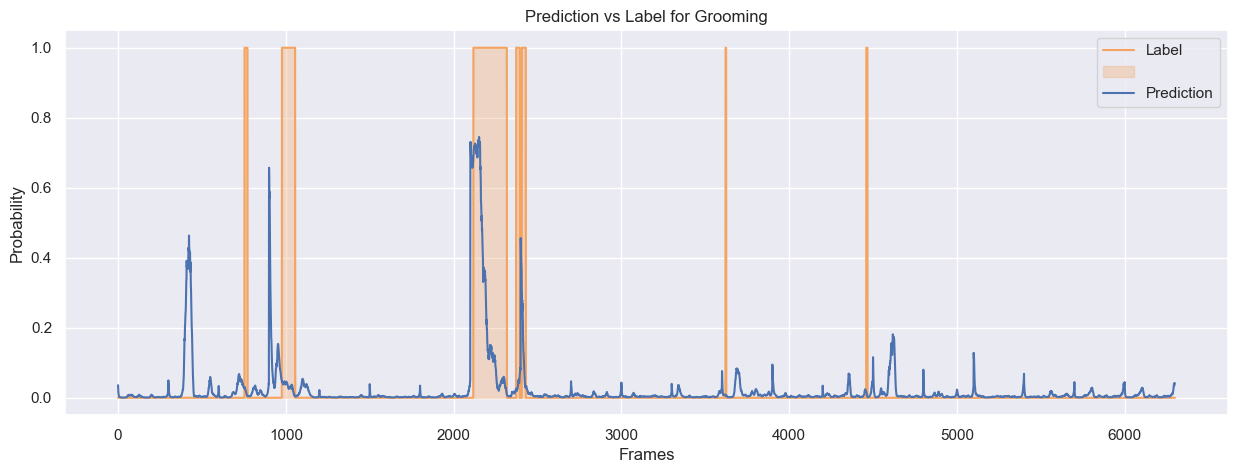

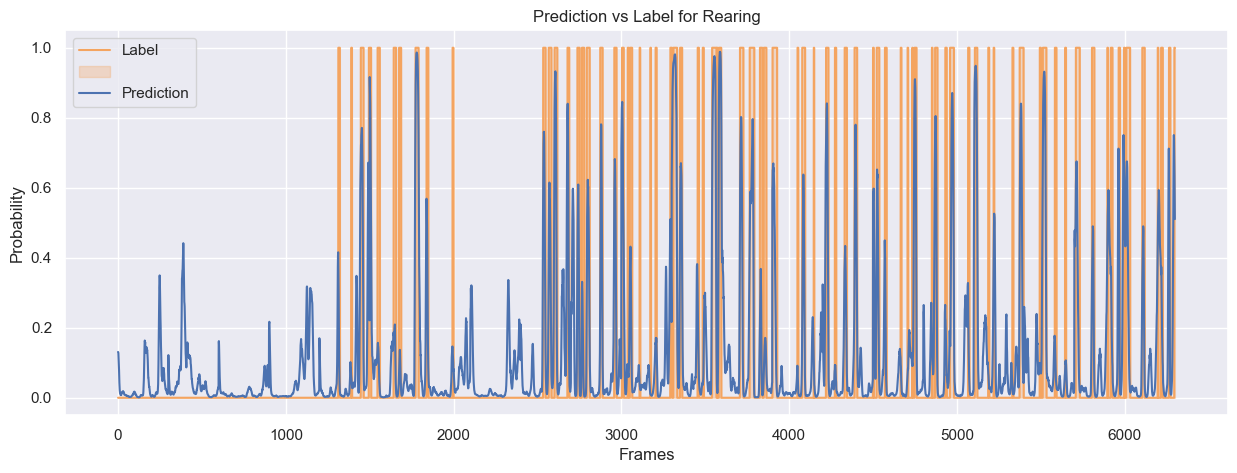

We will compute the PRC curve to choose the best threshold.


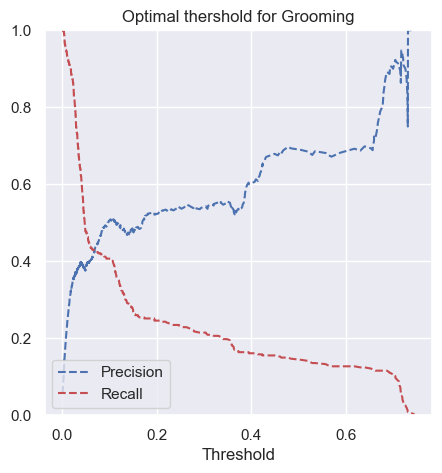

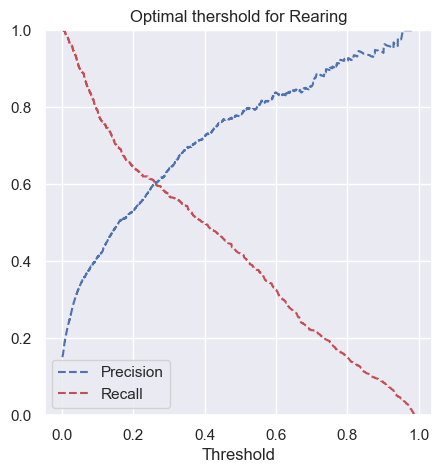

Lastly we will plot the confussion matrix for each behaviour


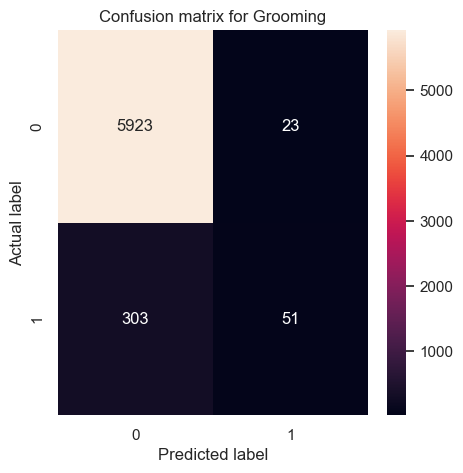

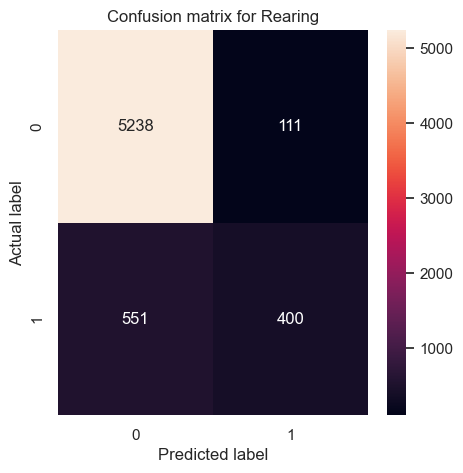

In [12]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)

### Results video HD_ChR2_480A.mp4

In [13]:
X, Y = val_seq['HD_ChR2_480A']

# Add metrics to DataFrame
df_g.loc['HD_ChR2_480A'] = model_grooming.evaluate(X,Y[:,:,0])[-4:]
df_r.loc['HD_ChR2_480A'] = model_rearing.evaluate(X,Y[:,:,1])[-4:]

pred_g = np.ndarray.flatten(model_grooming.predict(X)[:,:,0])
label_g = np.ndarray.flatten(Y[:,:,0])

pred_r = np.ndarray.flatten(model_rearing.predict(X)[:,:,0])
label_r = np.ndarray.flatten(Y[:,:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.9536 - fn: 219.0000 - fp: 101.0000 - loss: 0.1336 - prc: 0.9445 - precision: 0.9205 - recall: 0.8422 - tn: 5411.0000 - tp: 1169.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.9167 - fn: 439.0000 - fp: 136.0000 - loss: 0.2142 - prc: 0.8121 - precision: 0.8407 - recall: 0.6206 - tn: 5607.0000 - tp: 718.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


We will start by plotting the labels and actual predictions along the video frames.


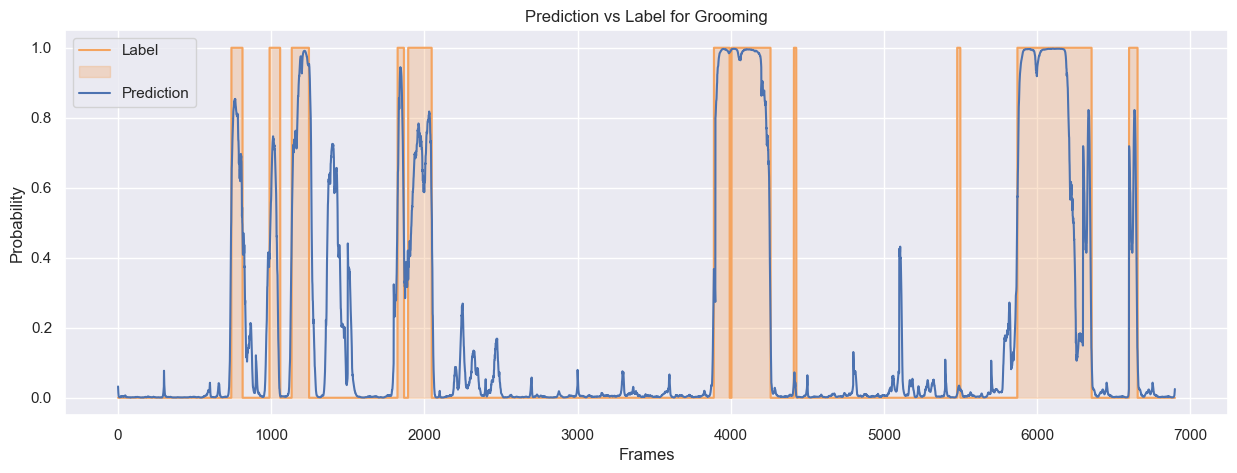

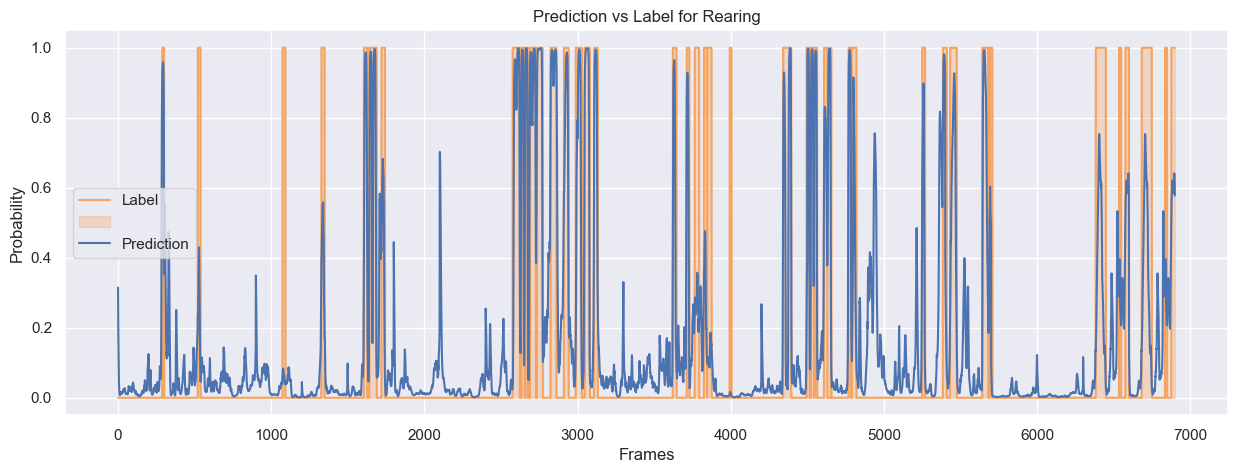

We will compute the PRC curve to choose the best threshold.


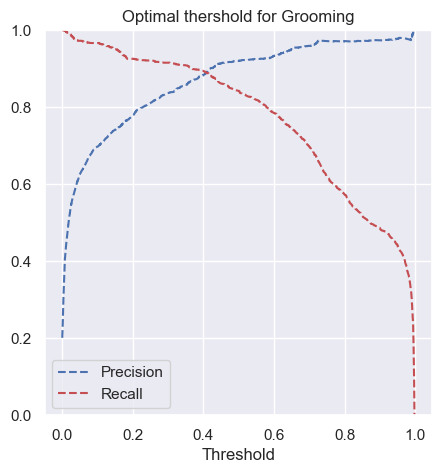

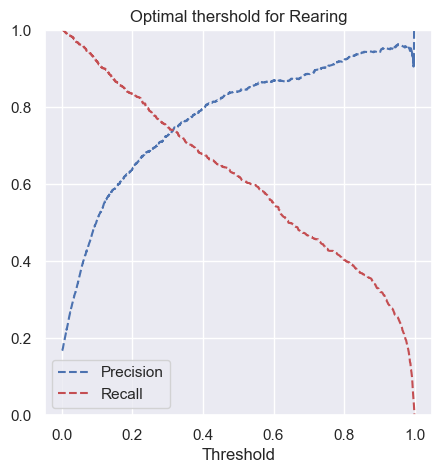

Lastly we will plot the confussion matrix for each behaviour


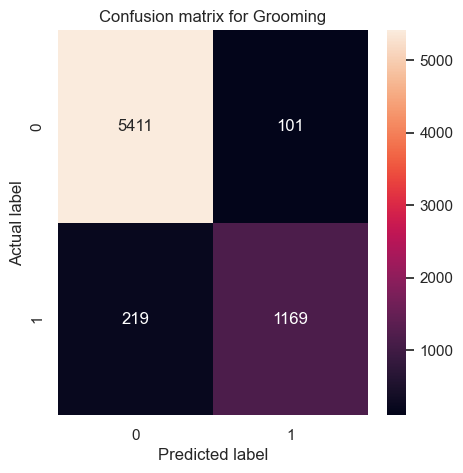

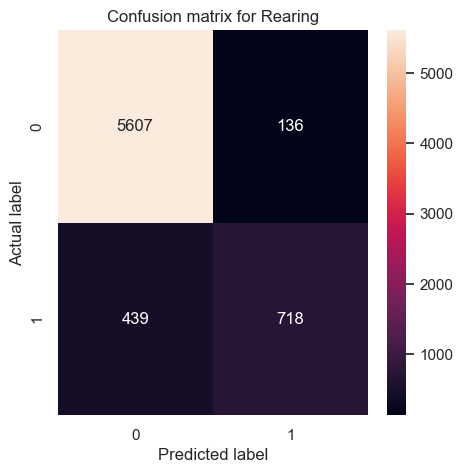

In [14]:
print('We will start by plotting the labels and actual predictions along the video frames.')
for b in behaviours:
    if b == 'Grooming':
        plot_behaviours(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_behaviours(label_r, pred_r, b)

print('We will compute the PRC curve to choose the best threshold.')
for b in behaviours:
    if b == 'Grooming':
        plot_PRC_Curve(label_g, pred_g, b)
    elif b == 'Rearing':
        plot_PRC_Curve(label_r, pred_r, b)

print('Lastly we will plot the confussion matrix for each behaviour')
for b in behaviours:
    if b == 'Grooming':
        plot_confussionmatrix(label_g, pred_g, b, threshold=0.5)
    elif b == 'Rearing':
        plot_confussionmatrix(label_r, pred_r, b, threshold=0.5)